In [1]:
from sklearn.decomposition import PCA
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import math as m

from random import seed
from random import random
from random import gauss

import matplotlib as mpl
import matplotlib.pyplot as plt

In [435]:
def Sin_signal(x, r, a=10., p=0., T=1.):
    # Amplitude: a
    # Phase : p
    # Frequency
    f = 2.*m.pi/T
    # Noise
    n = r*gauss(0, 1.)

    y =  a*m.sin(f*x + p) + n
    
    return(y)

In [436]:
Sin_signal_vect = np.vectorize(Sin_signal)

In [437]:
x = np.array(( np.linspace(0, 1, 53)))

for i in range(0,15000):
    x = np.vstack([x, np.linspace(0, 1, 53)])

In [438]:
len(x)

15001

In [439]:
sgn_1 = Sin_signal_vect(x[0], r=0.)
sgn_2 = Sin_signal_vect(x[0], r=0, a=11. + 2.5*gauss(0., 0.5))
sgn_3 = Sin_signal_vect(x[0], r=0, p=0.25 + 0.1*gauss(0., 0.1))
sgn_4 = Sin_signal_vect(x[0], r=0, T=0.5 + 0.5*gauss(0., 0.5))

for i in range(1, len(x)):
    # Default signal:: a=10, T=1., r=0.1, p=0 
    s1 = Sin_signal_vect(x[i], r=0.1)
    sgn_1 = np.vstack([sgn_1, s1])
    
    s2 = Sin_signal_vect(x[i], r=0., a=11. + 2.5*gauss(0., 0.5))
    sgn_2 = np.vstack([sgn_2, s2])
    
    s3 = Sin_signal_vect(x[i], r=0., p=0.25 + 0.1*gauss(0., 0.1))
    sgn_3 = np.vstack([sgn_3, s3])
    
    s4 = Sin_signal_vect(x[i], r=0., T=0.5 + 0.5*gauss(0., 0.5))
    sgn_4 = np.vstack([sgn_4, s4])
    
    #print(a, p, T)


In [440]:
sgn_5 = sgn_4 - 0.5*sgn_2

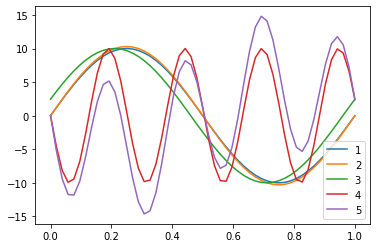

In [441]:
plt.plot(x[1], sgn_1[0], label='1')
plt.plot(x[1], sgn_2[0], label='2')
plt.plot(x[1], sgn_3[0], label='3')
plt.plot(x[1], sgn_4[0], label='4')
plt.plot(x[1], sgn_5[0], label='5')
plt.legend()
plt.show()

In [442]:
sig_1 = xr.DataArray(sgn_1, dims=['amplitude', 'weeks'], name='sins_signals').to_dataset()
sig_2 = xr.DataArray(sgn_2, dims=['amplitude', 'weeks'], name='sins_signals').to_dataset()
sig_3 = xr.DataArray(sgn_3, dims=['amplitude', 'weeks'], name='sins_signals').to_dataset()
sig_4 = xr.DataArray(sgn_4, dims=['amplitude', 'weeks'], name='sins_signals').to_dataset()
sig_5 = xr.DataArray(sgn_5, dims=['amplitude', 'weeks'], name='sins_signals').to_dataset()

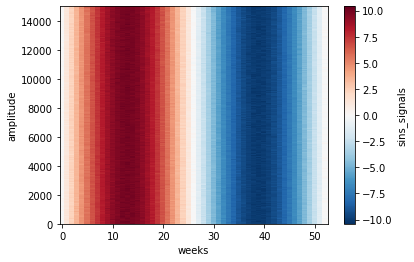

In [443]:
sig_1.sins_signals.plot()

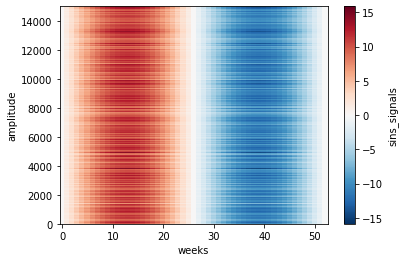

In [444]:
sig_2.sins_signals.plot()

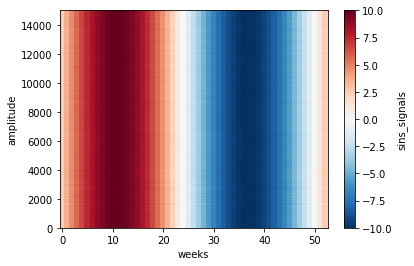

In [445]:
sig_3.sins_signals.plot()

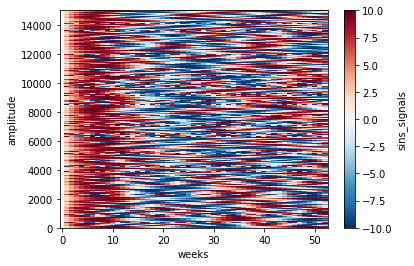

In [446]:
sig_4.sins_signals.plot()

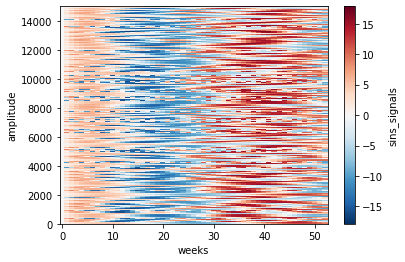

In [447]:
sig_5.sins_signals.plot()

## Statring PCA/EOF analysis

### Signal 1: Default sinusoidal, just noise

In [448]:
# Run the PCA analysis:
n_components = 15  # Rq: n_components cannot exceed ncols ! -> nweeks !
pca = PCA(n_components=n_components)
pca.fit(sig_1.sins_signals)

PCA(n_components=15)

In [449]:
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)


print('\nSingular values:')
print(pca.singular_values_)

Explained variance ratio:
[0.0207693  0.02052916 0.02045973 0.02018646 0.02012472 0.02000497
 0.0198897  0.01979058 0.01972405 0.01960598 0.01942812 0.01939799
 0.01924802 0.01913874 0.01903587]

Singular values:
[12.84088712 12.76643617 12.74483227 12.65943287 12.64005788 12.60239617
 12.56603326 12.53468573 12.51359775 12.47608693 12.41936834 12.40973472
 12.36167195 12.32653014 12.29335754]


In [450]:
reduced_values = pca.transform(sig_1.sins_signals)

In [451]:
print(pca.components_.size)

795


In [452]:
# Put all components_ analysis data to the dataset
sig_1['reduced_data'] = xr.DataArray(reduced_values, dims=['sample', 'n_eof'])
sig_1['eigen_values'] = xr.DataArray(pca.components_, dims=['n_eof', 'week'], 
                                  attrs={'comment': 'Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.'})
sig_1['explained_variance'] = xr.DataArray(pca.explained_variance_ratio_*100, 
                                        dims=['n_eof'], attrs={'comment': 'Percentage of variance explained by each of the selected components'})

In [453]:
sig_1

<xarray.Dataset>
Dimensions:             (amplitude: 15001, n_eof: 15, sample: 15001, week: 53, weeks: 53)
Dimensions without coordinates: amplitude, n_eof, sample, week, weeks
Data variables:
    sins_signals        (amplitude, weeks) float64 0.0 1.205 ... -1.188 -0.2357
    reduced_data        (sample, n_eof) float64 -0.0005724 0.0003165 ... 0.04067
    eigen_values        (n_eof, week) float64 0.01694 -0.1259 ... -0.1614
    explained_variance  (n_eof) float64 2.077 2.053 2.046 ... 1.925 1.914 1.904

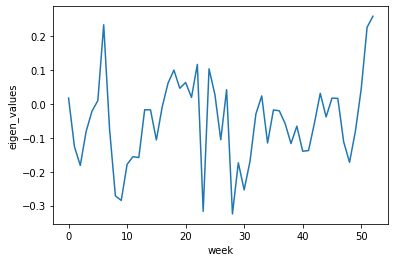

In [454]:
sig_1['eigen_values'][0].plot(hue='n_eof')
plt.show()

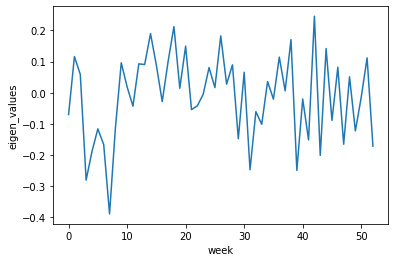

In [455]:
sig_1['eigen_values'][1].plot(hue='n_eof')
plt.show()

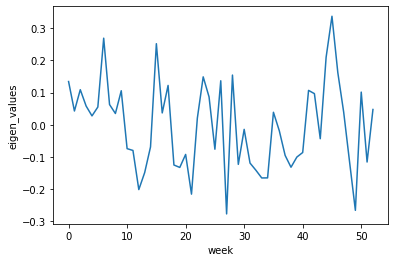

In [456]:
sig_1['eigen_values'][2].plot(hue='n_eof')
plt.show()

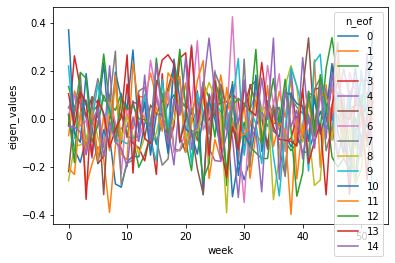

In [457]:
sig_1['eigen_values'].plot(hue='n_eof')
plt.show()

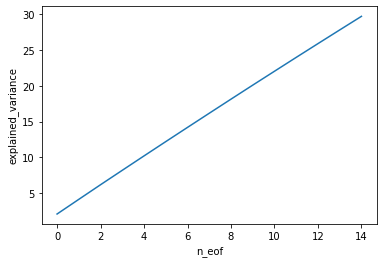

In [458]:
sig_1['explained_variance'].cumsum(dim='n_eof').plot()

### Signal 2: Random amplitude

In [459]:
# Run the PCA analysis:
n_components = 12  # Rq: n_components cannot exceed ncols ! -> nweeks !
pca = PCA(n_components=n_components)
pca.fit(sig_2.sins_signals)

PCA(n_components=12)

In [460]:
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)


print('\nSingular values:')
print(pca.singular_values_)

Explained variance ratio:
[1.00000000e+00 1.06015942e-27 1.41742204e-32 9.94025479e-33
 8.67039423e-33 6.83493140e-33 6.17305255e-33 5.03633870e-33
 3.49273402e-33 3.32374320e-33 3.08747096e-33 1.67946628e-33]

Singular values:
[7.79915240e+02 2.53941099e-11 9.28532261e-14 7.77581939e-14
 7.26217699e-14 6.44784348e-14 6.12769857e-14 5.53483745e-14
 4.60924893e-14 4.49636064e-14 4.33360025e-14 3.19619340e-14]


In [461]:
reduced_values = pca.transform(sig_2.sins_signals)

In [462]:
print(pca.components_.size)

636


In [463]:
# Put all components_ analysis data to the dataset
sig_2['reduced_data'] = xr.DataArray(reduced_values, dims=['sample', 'n_eof'])
sig_2['eigen_values'] = xr.DataArray(pca.components_, dims=['n_eof', 'week'], 
                                  attrs={'comment': 'Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.'})
sig_2['explained_variance'] = xr.DataArray(pca.explained_variance_ratio_*100, 
                                        dims=['n_eof'], attrs={'comment': 'Percentage of variance explained by each of the selected components'})

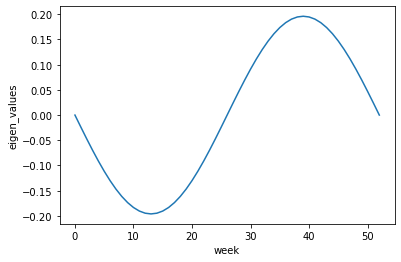

In [465]:
sig_2['eigen_values'][0].plot(hue='n_eof')
plt.show()

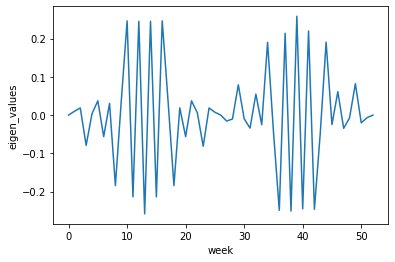

In [466]:
sig_2['eigen_values'][1].plot(hue='n_eof')
plt.show()

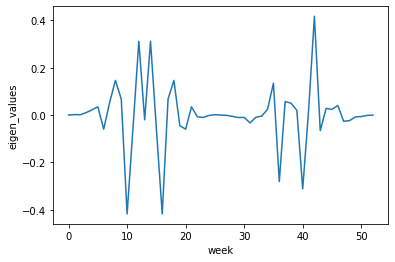

In [467]:
sig_2['eigen_values'][2].plot(hue='n_eof')
plt.show()

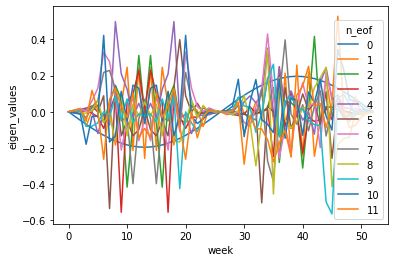

In [468]:
sig_2['eigen_values'].plot(hue='n_eof')
plt.show()

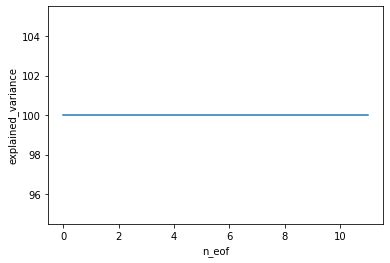

In [469]:
sig_2['explained_variance'].cumsum(dim='n_eof').plot()

### Signal 3: Random phase

In [470]:
# Run the PCA analysis:
n_components = 12  # Rq: n_components cannot exceed ncols ! -> nweeks !
pca = PCA(n_components=n_components)
pca.fit(sig_3.sins_signals)

PCA(n_components=12)

In [471]:
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)

print('\nSingular values:')
print(pca.singular_values_)

Explained variance ratio:
[9.99951659e-01 4.83410764e-05 1.29108344e-25 1.68903891e-28
 3.38559628e-29 2.14940916e-29 8.72278844e-30 3.59517604e-30
 2.33590285e-30 2.32180963e-30 1.88532489e-30 1.75928776e-30]

Singular values:
[6.29793096e+01 4.37891536e-01 2.26300518e-11 8.18517971e-13
 3.66459494e-13 2.91989974e-13 1.86009901e-13 1.19417637e-13
 9.62577666e-14 9.59669509e-14 8.64771749e-14 8.35366074e-14]


In [472]:
reduced_values = pca.transform(sig_3.sins_signals)

In [473]:
print(pca.components_.size)

636


In [474]:
# Put all components_ analysis data to the dataset
sig_3['reduced_data'] = xr.DataArray(reduced_values, dims=['sample', 'n_eof'])
sig_3['eigen_values'] = xr.DataArray(pca.components_, dims=['n_eof', 'week'], 
                                  attrs={'comment': 'Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.'})
sig_3['explained_variance'] = xr.DataArray(pca.explained_variance_ratio_*100, 
                                        dims=['n_eof'], attrs={'comment': 'Percentage of variance explained by each of the selected components'})

In [475]:
sig_3

<xarray.Dataset>
Dimensions:             (amplitude: 15001, n_eof: 12, sample: 15001, week: 53, weeks: 53)
Dimensions without coordinates: amplitude, n_eof, sample, week, weeks
Data variables:
    sins_signals        (amplitude, weeks) float64 2.457 3.608 ... 1.254 2.441
    reduced_data        (sample, n_eof) float64 0.08135 -0.002435 ... -5.586e-16
    eigen_values        (n_eof, week) float64 -0.1867 -0.1796 ... -0.02662
    explained_variance  (n_eof) float64 100.0 0.004834 ... 1.885e-28 1.759e-28

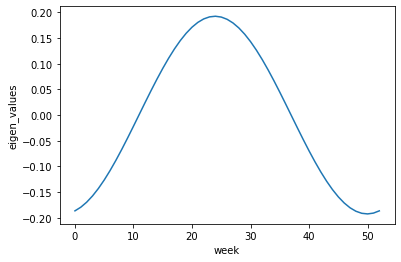

In [476]:
sig_3['eigen_values'][0].plot(hue='n_eof')
plt.show()

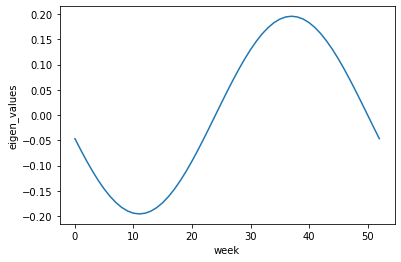

In [477]:
sig_3['eigen_values'][1].plot(hue='n_eof')
plt.show()

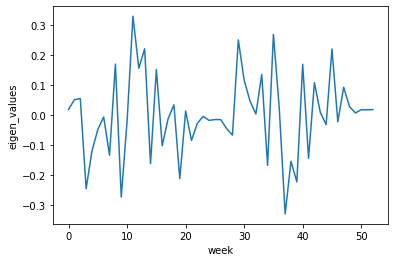

In [478]:
sig_3['eigen_values'][2].plot(hue='n_eof')
plt.show()

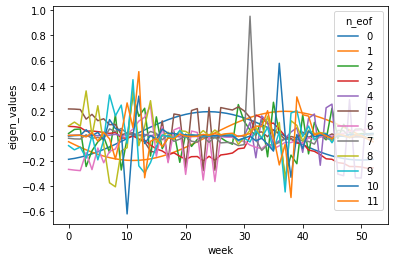

In [479]:
sig_3['eigen_values'].plot(hue='n_eof')
plt.show()

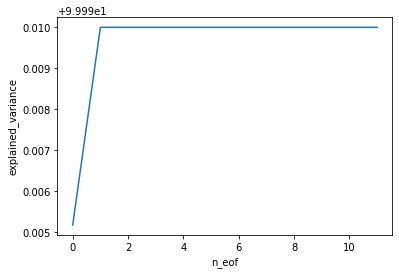

In [480]:
sig_3['explained_variance'].cumsum(dim='n_eof').plot()

### Signal 4: Random frequency

In [481]:
# Run the PCA analysis:
n_components = 12  # Rq: n_components cannot exceed ncols ! -> nweeks !
pca = PCA(n_components=n_components)
pca.fit(sig_4.sins_signals)

PCA(n_components=12)

In [482]:
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)


print('\nSingular values:')
print(pca.singular_values_)

Explained variance ratio:
[0.2469793  0.22065541 0.11947384 0.09821782 0.05927413 0.05062541
 0.03174284 0.02545087 0.0185712  0.01570376 0.01172604 0.01008234]

Singular values:
[2862.93546815 2706.06717625 1991.21289283 1805.4124581  1402.53551683
 1296.18071871 1026.37045862  919.03619074  785.05704884  721.91015749
  623.81657803  578.44477263]


In [483]:
reduced_values = pca.transform(sig_4.sins_signals)

In [484]:
print(pca.components_.size)

636


In [485]:
# Put all components_ analysis data to the dataset
sig_4['reduced_data'] = xr.DataArray(reduced_values, dims=['sample', 'n_eof'])
sig_4['eigen_values'] = xr.DataArray(pca.components_, dims=['n_eof', 'week'], 
                                  attrs={'comment': 'Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.'})
sig_4['explained_variance'] = xr.DataArray(pca.explained_variance_ratio_*100, 
                                        dims=['n_eof'], attrs={'comment': 'Percentage of variance explained by each of the selected components'})

In [486]:
sig_4

<xarray.Dataset>
Dimensions:             (amplitude: 15001, n_eof: 12, sample: 15001, week: 53, weeks: 53)
Dimensions without coordinates: amplitude, n_eof, sample, week, weeks
Data variables:
    sins_signals        (amplitude, weeks) float64 0.0 -4.606 ... -8.235 -9.213
    reduced_data        (sample, n_eof) float64 -2.61 -9.933 ... -0.8401 0.492
    eigen_values        (n_eof, week) float64 -3.58e-18 -0.01907 ... -0.2119
    explained_variance  (n_eof) float64 24.7 22.07 11.95 ... 1.57 1.173 1.008

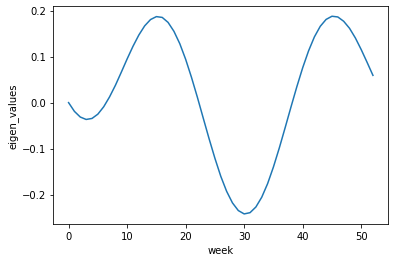

In [487]:
sig_4['eigen_values'][0].plot(hue='n_eof')
plt.show()

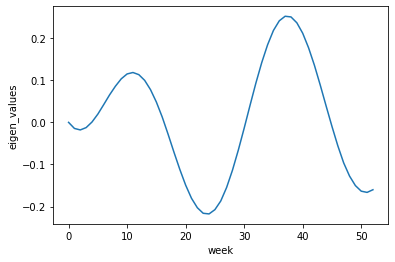

In [488]:
sig_4['eigen_values'][1].plot(hue='n_eof')
plt.show()

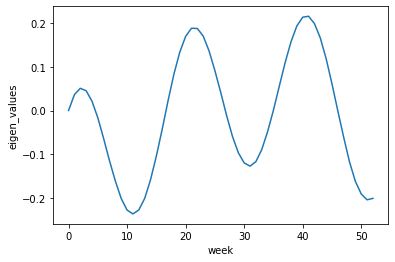

In [489]:
sig_4['eigen_values'][2].plot(hue='n_eof')
plt.show()

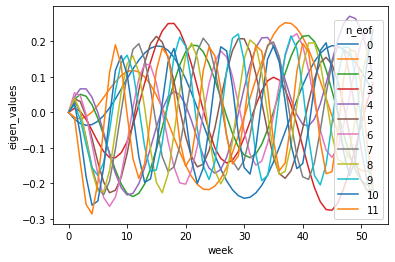

In [490]:
sig_4['eigen_values'].plot(hue='n_eof')
plt.show()

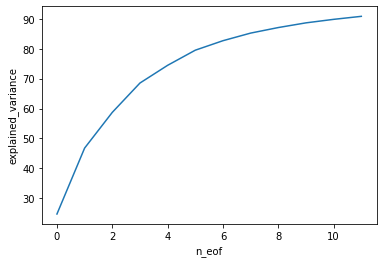

In [491]:
sig_4['explained_variance'].cumsum(dim='n_eof').plot()

### Signal 5: Addition of signals:: 4-1

In [492]:
# Run the PCA analysis:
n_components = 12  # Rq: n_components cannot exceed ncols ! -> nweeks !
pca = PCA(n_components=n_components)
pca.fit(sig_5.sins_signals)

PCA(n_components=12)

In [493]:
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)


print('\nSingular values:')
print(pca.singular_values_)

Explained variance ratio:
[0.24624346 0.21997736 0.11961103 0.09876479 0.06050289 0.05041059
 0.03184157 0.02535542 0.01858747 0.01564326 0.01174948 0.01007827]

Singular values:
[2864.69629068 2707.60453797 1996.55759936 1814.25076149 1419.98681989
 1296.15557138 1030.13336898  919.24575351  787.05725947  722.03778517
  625.75674905  579.54772238]


In [494]:
reduced_values = pca.transform(sig_5.sins_signals)

In [495]:
print(pca.components_.size)

636


In [496]:
# Put all components_ analysis data to the dataset
sig_5['reduced_data'] = xr.DataArray(reduced_values, dims=['sample', 'n_eof'])
sig_5['eigen_values'] = xr.DataArray(pca.components_, dims=['n_eof', 'week'], 
                                  attrs={'comment': 'Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.'})
sig_5['explained_variance'] = xr.DataArray(pca.explained_variance_ratio_*100, 
                                        dims=['n_eof'], attrs={'comment': 'Percentage of variance explained by each of the selected components'})

In [497]:
sig_5

<xarray.Dataset>
Dimensions:             (amplitude: 15001, n_eof: 12, sample: 15001, week: 53, weeks: 53)
Dimensions without coordinates: amplitude, n_eof, sample, week, weeks
Data variables:
    sins_signals        (amplitude, weeks) float64 0.0 -5.226 ... -7.603 -9.213
    reduced_data        (sample, n_eof) float64 -1.987 -10.5 ... -1.011 0.404
    eigen_values        (n_eof, week) float64 -1.123e-17 -0.01881 ... -0.2177
    explained_variance  (n_eof) float64 24.62 22.0 11.96 ... 1.564 1.175 1.008

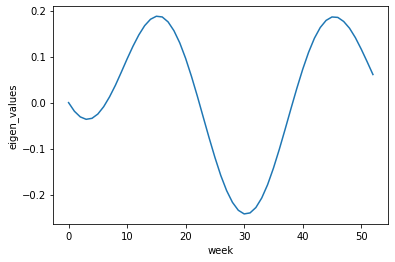

In [498]:
sig_5['eigen_values'][0].plot(hue='n_eof')
plt.show()

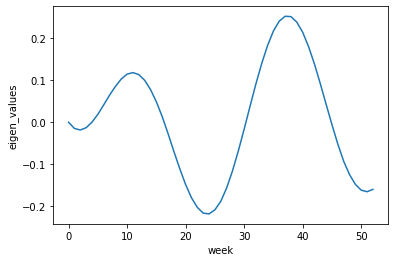

In [499]:
sig_5['eigen_values'][1].plot(hue='n_eof')
plt.show()

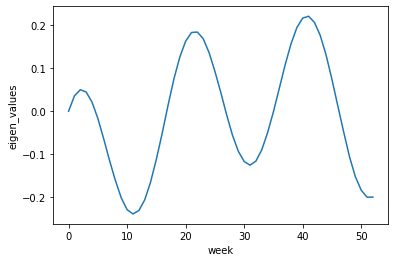

In [500]:
sig_5['eigen_values'][2].plot(hue='n_eof')
plt.show()

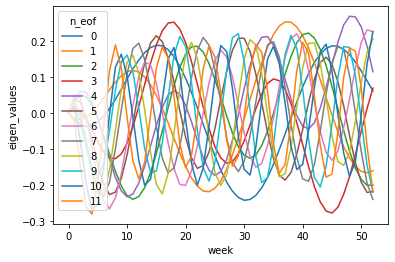

In [501]:
sig_5['eigen_values'].plot(hue='n_eof')
plt.show()

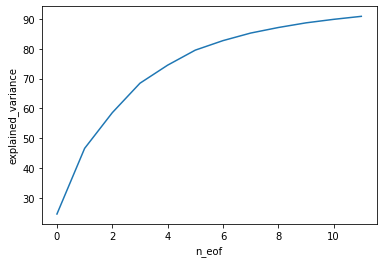

In [502]:
sig_5['explained_variance'].cumsum(dim='n_eof').plot()

MemoryError: Unable to allocate 321. MiB for an array with shape (15001, 53, 53) and data type float64